# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib import parse
import requests
from scipy.stats import linregress as lm

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations (spherically distributed)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
uniform_lats = np.random.uniform(-1, 1, size=1500)
lats = np.arcsin(uniform_lats) * (180.0 / np.pi)  # Convert from radians to degrees

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 716


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_lib = {
        'q': city,
        'appid': weather_api_key,
        'units': 'metric'
    }
    city_url = url+'?'+parse.urlencode(city_lib)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] # unix utc

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mugia
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | cova figueira
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | jacmel
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | lospalos
Processing Record 12 of Set 1 | salalah
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | baldwinsville
Processing Record 16 of Set 1 | newman
Processing Record 17 of Set 1 | lagoa
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | alamosa
Processing Record 20 of Set 1 | sinop
Processing Record 21 of Set 1 | ponta delgada
Processing Record 22 of S

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          684
Lat           684
Lng           684
Max Temp      684
Humidity      684
Cloudiness    684
Wind Speed    684
Country       684
Date          684
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mugia,43.1041,-9.2179,21.06,63,34,5.89,ES,1689418408
1,utrik,11.2278,169.8474,28.27,74,82,7.95,MH,1689418410
2,sitka,57.0531,-135.3300,12.94,94,100,2.06,US,1689418411
3,cova figueira,14.8905,-24.2934,24.12,80,99,0.93,CV,1689418413
4,blackmans bay,-43.0167,147.3167,9.29,63,34,6.18,AU,1689418414


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mugia,43.1041,-9.2179,21.06,63,34,5.89,ES,1689418408
1,utrik,11.2278,169.8474,28.27,74,82,7.95,MH,1689418410
2,sitka,57.0531,-135.3300,12.94,94,100,2.06,US,1689418411
3,cova figueira,14.8905,-24.2934,24.12,80,99,0.93,CV,1689418413
4,blackmans bay,-43.0167,147.3167,9.29,63,34,6.18,AU,1689418414


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

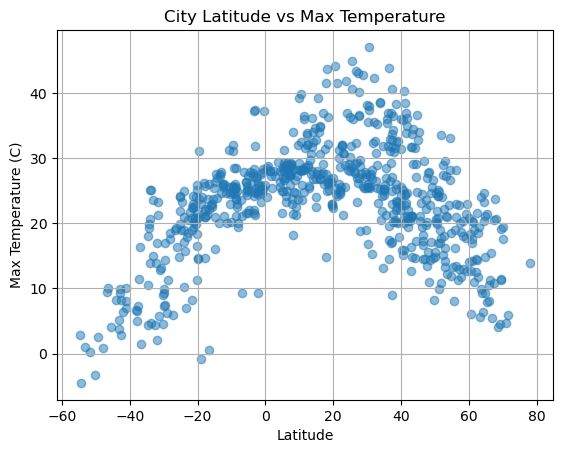

In [4]:
# Build scatter plot for latitude vs. temperature
plt.figure()
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.5)
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

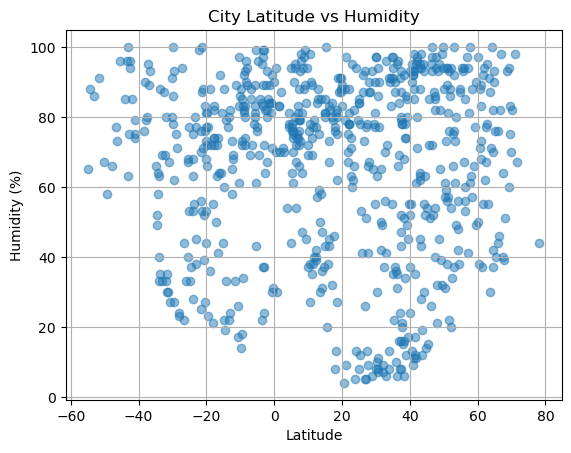

In [5]:
# Build the scatter plots for latitude vs. humidity
plt.figure()
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.5)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

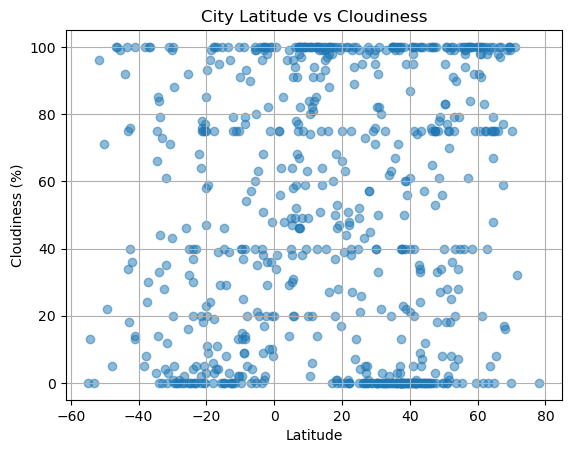

In [6]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure()
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.5)
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

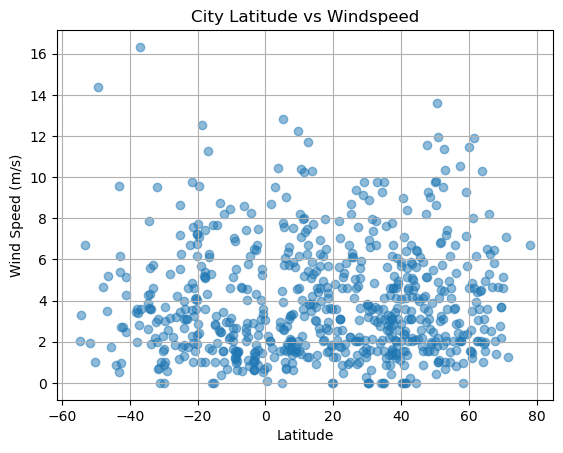

In [7]:
# Build the scatter plots for latitude vs. wind speed
plt.figure()
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.5)
plt.title('City Latitude vs Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def dflm(df,x,y):

  slope, intercept, r_value, p_value, std_err = lm(df[x], df[y])
  line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}, r = {str(round(r_value,2))}"

  plt.scatter(df[x], df[y], alpha=0.5)
  plt.title(f'{y} vs. {x} Linear Regression')
  plt.xlabel(x)
  plt.ylabel(y)
  plt.grid(True)

  reg = slope*df[x]+intercept
  plt.plot(df[x], reg, "r-")
  plt.annotate(line_eq, (10,20), xycoords = 'axes pixels')

  plt.show()

  return {
    'slope': slope,
    'intercept': intercept,
    'r_value': r_value,
    'p_value': p_value,
    'std_err': std_err,
  }


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mugia,43.1041,-9.2179,21.06,63,34,5.89,ES,1689418408
1,utrik,11.2278,169.8474,28.27,74,82,7.95,MH,1689418410
2,sitka,57.0531,-135.3300,12.94,94,100,2.06,US,1689418411
3,cova figueira,14.8905,-24.2934,24.12,80,99,0.93,CV,1689418413
5,jacmel,18.2342,-72.5347,24.91,81,1,1.50,HT,1689418416


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,blackmans bay,-43.0167,147.3167,9.29,63,34,6.18,AU,1689418414
6,bredasdorp,-34.5322,20.0403,18.10,49,75,4.28,ZA,1689418417
8,puerto ayora,-0.7393,-90.3518,25.31,92,48,3.58,EC,1689418384
10,lospalos,-8.5186,127.0025,21.20,93,79,2.66,TL,1689418422
12,edinburgh of the seven seas,-37.0676,-12.3116,16.29,89,100,16.33,SH,1689418424


###  Temperature vs. Latitude Linear Regression Plot

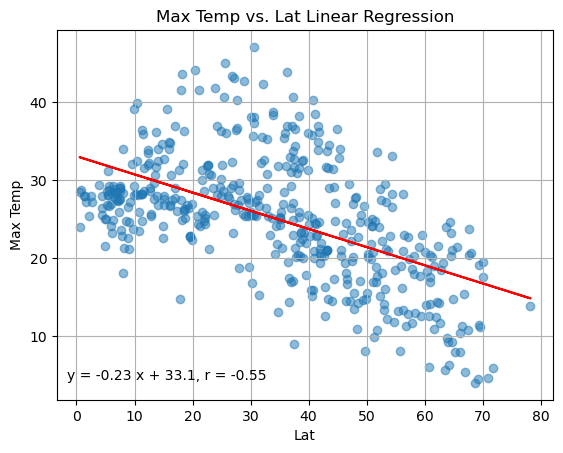

The r-value is: -0.5496237200762817


In [37]:
# Linear regression on Northern Hemisphere
temp_n_lm = dflm(northern_hemi_df,'Lat','Max Temp')
print("The r-value is: "+str(temp_n_lm['r_value']))

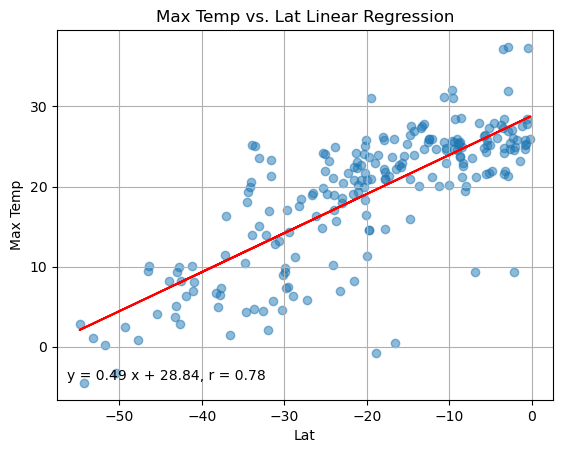

The r-value is: 0.7784781963631316


In [38]:
# Linear regression on Southern Hemisphere
temp_s_lm = dflm(southern_hemi_df,'Lat','Max Temp')
print("The r-value is: "+str(temp_s_lm['r_value']))

**Discussion about the linear relationship:**

Maximum temperatures in both hemispheres are dependent on the degree of latitude. A linear regression with a reasonable degree of fit, indicates that the maximum temperature will decrease by approximately 0.2 to 0.5 degrees Celsius for each degree latitude you move from the equator (North and South respectively). Northern hemisphere data is more dispersed than Southern hemisphere data.

As observed when plotting both hemispheres together, the curve is sinusoidal. This is expected for a single point in time. Warmer cities in the summer Northern hemisphere can also be observed.

### Humidity vs. Latitude Linear Regression Plot

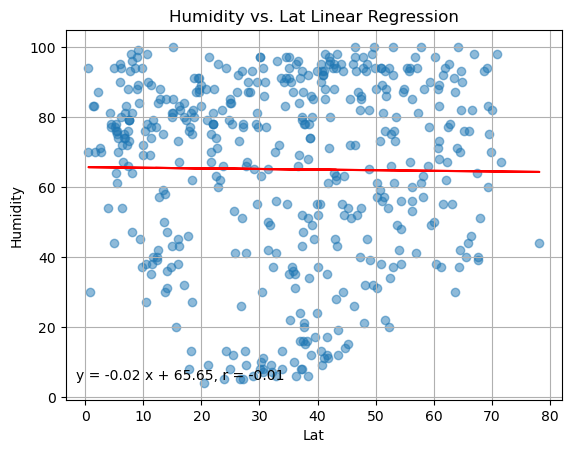

The r-value is: -0.012219253598904965


In [39]:
# Northern Hemisphere
hum_n_lm = dflm(northern_hemi_df,'Lat','Humidity')
print("The r-value is: "+str(hum_n_lm['r_value']))

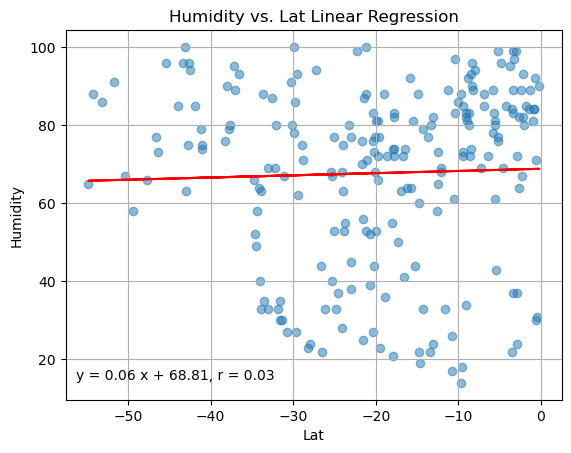

The r-value is: 0.03290668803711071


In [40]:
# Southern Hemisphere
hum_s_lm = dflm(southern_hemi_df,'Lat','Humidity')
print("The r-value is: "+str(hum_s_lm['r_value']))

**Discussion about the linear relationship:** 

The relationship between the variables is much weaker, with absolute r values below 0.2 observed. From this one may infer that latitude does not have a significant direct impact on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

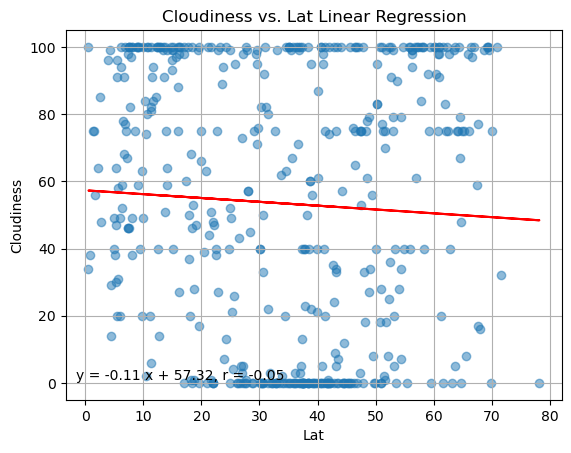

The r-value is: -0.05374624088209331


In [41]:
# Northern Hemisphere
cloud_n_lm = dflm(northern_hemi_df,'Lat','Cloudiness')
print("The r-value is: "+str(cloud_n_lm['r_value']))

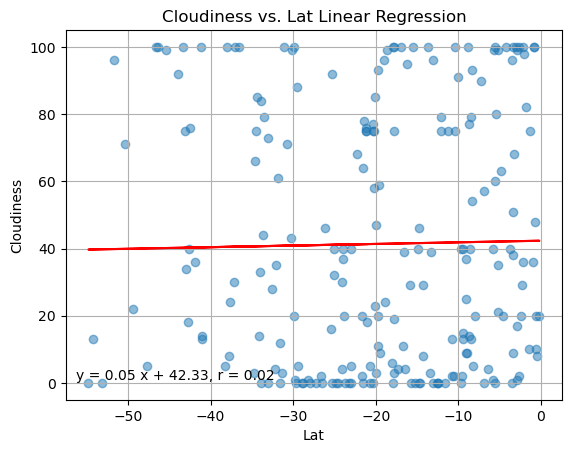

The r-value is: 0.01720429332181198


In [42]:
# Southern Hemisphere
cloud_s_lm = dflm(southern_hemi_df,'Lat','Cloudiness')
print("The r-value is: "+str(cloud_s_lm['r_value']))

**Discussion about the linear relationship:**

Similarly, no significant correlation is identified with cloud cover by latitude. Clustering around 0 and 1 (no and full) cloud cover is also observed, which may indicate that a logistic transform may be appropriate before fitting a regression.

### Wind Speed vs. Latitude Linear Regression Plot

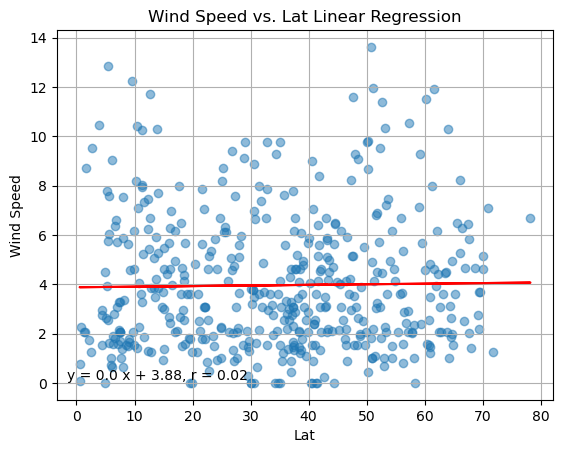

The r-value is: 0.016790202434114148


In [43]:
# Northern Hemisphere
wind_n_lm = dflm(northern_hemi_df,'Lat','Wind Speed')
print("The r-value is: "+str(wind_n_lm['r_value']))


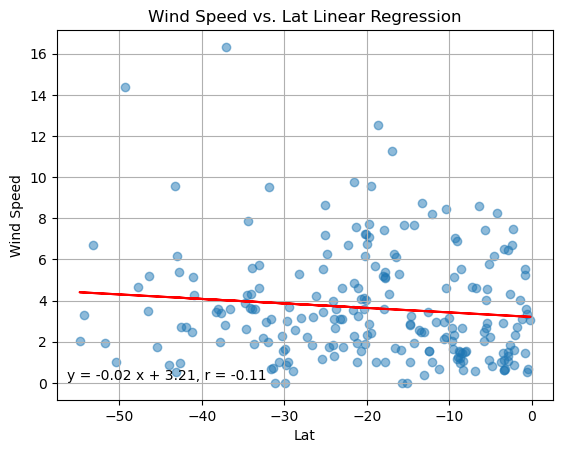

The r-value is: -0.10918395430694176


In [44]:
# Southern Hemisphere
wind_s_lm = dflm(southern_hemi_df,'Lat','Wind Speed')
print("The r-value is: "+str(wind_s_lm['r_value']))

**Discussion about the linear relationship:** 

Similarly, no strong relationship between latitude and windspeed is found. Note that these wind readings are for near-surface reads around urbanised areas, and that wind speed variation by latitude should be expected at higher altitudes.